## Packages

In [9]:
import time
import numpy as np
import h5py
import matplotlib.pyplot as plt
import scipy
from PIL import Image
from scipy import ndimage

%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

np.random.seed(1)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
def load_data(path):
    train_dataset = h5py.File(path+'\\train_catvnoncat.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels

    test_dataset = h5py.File(path+'\\test_catvnoncat.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes


## Dataset

To be familiar with the dataset, load the data by running the cell below.

In [11]:
train_x_orig, train_y, test_x_orig, test_y, classes = load_data('C:\\Users\\Eren\\Desktop') # you need to change your dataset path

The following code will show you an image in the dataset. Feel free to change the index and re-run the cell multiple times to see other images. 

y = 1. It's a cat picture.


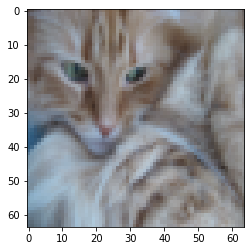

In [12]:
# Example of a picture
index = 2
plt.imshow(train_x_orig[index])
print ("y = " + str(train_y[0,index]) + ". It's a " + classes[train_y[0,index]].decode("utf-8") +  " picture.")

In [13]:
# Explore your dataset 
m_train = train_x_orig.shape[0]
num_px = train_x_orig.shape[1]
m_test = test_x_orig.shape[0]

'''print ("Number of training examples: " + str(m_train))
print ("Number of testing examples: " + str(m_test))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_x_orig shape: " + str(train_x_orig.shape))
print ("train_y shape: " + str(train_y.shape))
print ("test_x_orig shape: " + str(test_x_orig.shape))
print ("test_y shape: " + str(test_y.shape))'''

'print ("Number of training examples: " + str(m_train))\nprint ("Number of testing examples: " + str(m_test))\nprint ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")\nprint ("train_x_orig shape: " + str(train_x_orig.shape))\nprint ("train_y shape: " + str(train_y.shape))\nprint ("test_x_orig shape: " + str(test_x_orig.shape))\nprint ("test_y shape: " + str(test_y.shape))'

In [14]:
# Reshape the training and test examples 

train_x_flatten = train_x_orig.reshape(train_x_orig.shape[0], -1).T   # The "-1" makes reshape flatten the remaining dimensions
test_x_flatten = test_x_orig.reshape(test_x_orig.shape[0], -1).T

# Standardize data to have feature values between 0 and 1.
train_x = train_x_flatten/255.
test_x = test_x_flatten/255.
'''
print ("train_x's shape: " + str(train_x.shape))
print ("test_x's shape: " + str(test_x.shape))
print("train_y's shape"+ str(train_y.shape))
print("test_y's shape"+ str(test_y.shape))
print(len(train_x[1]))'''

'\nprint ("train_x\'s shape: " + str(train_x.shape))\nprint ("test_x\'s shape: " + str(test_x.shape))\nprint("train_y\'s shape"+ str(train_y.shape))\nprint("test_y\'s shape"+ str(test_y.shape))\nprint(len(train_x[1]))'

In [15]:
### CONSTANTS DEFINING THE MODEL ####
n_x = 12288     # num_px * num_px * 3
n_h = 7
n_y = 1
layers_dims = (n_x, n_h, n_y)

In [16]:
def initialize_parameters_deep(layers_dims):
    """
    Arguments:
    layer_dims -- python array (list) containing the dimensions of each layer in our network
    
    Returns:
    parameters -- python dictionary containing your parameters "W1", "b1","W2", "b2":
    """
    
    
    np.random.seed(1)
    parameters = {}
    
    parameters["W1"] = np.random.randn(layers_dims[1],layers_dims[0])
    parameters["b1"] = np.random.randn(layers_dims[1],layers_dims[2])
    parameters["W2"] = np.random.randn(layers_dims[1],layers_dims[2])
    parameters["b2"] = np.random.randn(layers_dims[2],layers_dims[2])
    return parameters
    


In [17]:
def linear_activation_forward(X,parameters):
    """
    Implement the forward propagation

    Arguments:
    X -- input data:
    parameters -- python dictionary containing your parameters "W1", "b1","W2", "b2":

    Returns:
    AL -- output of the forward propogation
    """
    AL = []
    Z1 = []
    Z2 = []
    A1 = []
    steps = dict()
    def sigmoid(x):
        result = 1/(1+np.exp(-x))
        return result
    for x in range(int(len(X[1]))):    
        hidden_output = []
        z1list = []
        
        for i in range(n_h):
            hidden_layer_output = np.dot(parameters["W1"][i,:], X[:,x].T)+parameters["b1"][i]##########LİNEAR 1 Z1
            z1list.append(hidden_layer_output)
            hidden_output.append(max(0,float(hidden_layer_output)))##########.#RELU A1      
        
        A1.append(sum(hidden_output)/7)
        Z1.append(z1list)
        hidden_output = np.array(hidden_output).reshape(1,7)
        linear2 = float(np.dot(hidden_output[:,0], parameters["W2"][0,:])+parameters["b2"][0]) #LİNEAR 2 Z2
        Z2.append(linear2)
        lastsigma = sigmoid(linear2) #A2
        AL.append(lastsigma)
    

    AL = np.array(AL).reshape(len(AL),1)
    
    return AL



In [18]:
def compute_cost(AL, Y):
    """
    Implement the cost function defined by equation (7).

    Arguments:
    AL -- probability vector corresponding to your label predictions, shape (1, number of examples)
    Y -- true "label" vector (for example: containing 0 if non-cat, 1 if cat), shape (1, number of examples)

    Returns:
    cost -- cost
    """
    cost = 0
    AL = np.array(AL).reshape(len(AL),)
    AL = np.clip(AL, 1e-7, 1-1e-7)
    for i in range(len(AL)):
        cost = cost + (1-Y.T[i])*(np.log(1-float(AL[i]))) + (Y.T[i]*(np.log(float(AL[i]))))
    cost = (-1/len(AL))*cost
    return cost   

In [19]:
def linear_activation_backward(X,cost):
    """
    Implement the backward propagation
    
    Arguments:
    X -- input data
    cost -- cost
    
    Returns:
    grads --  A dictionary with the gradients
             grads["dW1"]
             grads["db1"]
             grads["dW2"]
             grads["db2"]
    """
    grads = dict()
    parameters = initialize_parameters_deep(layers_dims)
    dZ2 = cost/len(X[1])
    Z2 = np.log((1-dZ2)/dZ2)
    A1 = (Z2-np.sum(parameters["b2"])/len(parameters["b2"]))/(np.sum(parameters["W2"])/len(parameters["W2"]))
    dW2 = A1*dZ2
    Z1 = (np.sum(X, axis=1)/len(X[1]))*(np.sum(parameters["W1"].T, axis=1)/len(parameters["W1"][0]))+(np.sum(parameters["b1"])/len(parameters["b1"]))
    dZ1 = dW2*dZ2
    dW1 = dZ1*(np.sum(X, axis=1)/len(X[1]))
    db1 = dZ1
    grads["dW2"] = dW2
    grads["db2"] = dZ2
    grads["dW1"] = np.sum(dW1)/len(dW1)
    grads["db1"] = db1
    return grads
    

    

In [20]:
def update_parameters(parameters, grads, learning_rate):
    """
    Update parameters using gradient descent
    
    Arguments:
    pa rameters -- python dictionary containing your parameters 
    grads -- python dictionary containing your gradients, output of L_model_backward
    
    Returns:
    parameters -- python dictionary containing your updated parameters 
             parameters["W1"]
             parameters["b1"]
             parameters["W2"]
             parameters["b2"]
    """
    parameters["b2"] = parameters["b2"] - (learning_rate*grads["db2"])
    parameters["b1"] = parameters["b1"] - (learning_rate*grads["db1"])
    for i in range(len(train_y[0])):    
        parameters["W2"] = parameters["W2"] - (learning_rate*grads["dW2"])
        parameters["W1"] = parameters["W1"] - (learning_rate*grads["dW1"])
        
    return parameters

In [21]:
def predict(test_x, test_y, parameters):
    prediction = []
    test = linear_activation_forward(test_x, parameters)[:,0]
    real = test_y[0,:].T
    for i in range(len(real)):
        if round(float(test[i])) == int(real[i]):
            prediction.append(1)
        else:
            prediction.append(0)
    
    accuracy = (prediction.count(1)/len(prediction))*100
    return accuracy

In [25]:
def plot_loss(costs):
   """
   Plot loss
   costs - cost of each iteration
   
   """ 
   xlabel = []
   for i in range(len(costs)):
      xlabel.append(i*100)
   ylabel = costs
   plt.plot(xlabel, ylabel)
   plt.xlabel("Iterations")
   plt.ylabel("Cost")
   plt.title("Cost - Iteration")
   plt.show()

In [26]:
def two_layer_model(X, Y, layers_dims, learning_rate = 0.0075, num_iterations = 3000):
    """
    Implements a two-layer neural network: LINEAR->RELU->LINEAR->SIGMOID.
    
    Arguments:
    X -- input data, of shape (n_x, number of examples)
    Y -- true "label" vector (containing 1 if cat, 0 if non-cat), of shape (1, number of examples)
    layers_dims -- dimensions of the layers (n_x, n_h, n_y)
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- If set to True, this will print the cost every 100 iterations 
    
    Returns:
    parameters -- a dictionary containing W1, W2, b1, and b2
    """
    
    np.random.seed(1)
    grads = {}
    costs = []                             
    m = X.shape[1]                          
    (n_x, n_h, n_y) = layers_dims
    parameters = initialize_parameters_deep(layers_dims)
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    for i in range(0, num_iterations):
        AL = linear_activation_forward(X, parameters)
        cost = compute_cost(AL ,Y)
        grads = linear_activation_backward(X, cost)
        parameters = update_parameters(parameters, grads, learning_rate)
        if i % 100 == 0:
            print("Cost after iteration {}: {}".format(i, np.squeeze(cost)))
        if i % 100 == 0:
            costs.append(cost)
    return parameters, costs

In [27]:
def main():
    parameters, costs = two_layer_model(train_x, train_y, layers_dims, learning_rate = 0.0075, num_iterations = 3000)
    print(predict(test_x, test_y, parameters))
    plot_loss(costs)
main()
    

Cost after iteration 0: 4.5263699463853495
Cost after iteration 100: 0.7800682382007366
Cost after iteration 200: 0.7202005751473676
Cost after iteration 300: 0.7196999054819592
Cost after iteration 400: 0.7192012406510239
Cost after iteration 500: 0.7187045761431767
Cost after iteration 600: 0.7182099074642309
Cost after iteration 700: 0.7177172301370943
Cost after iteration 800: 0.7172265397017628
Cost after iteration 900: 0.7167378317152306
Cost after iteration 1000: 0.7162511017514781
Cost after iteration 1100: 0.7157663454013813
Cost after iteration 1200: 0.7152835582726976
Cost after iteration 1300: 0.7148027359900007
Cost after iteration 1400: 0.7143238741946171
Cost after iteration 1500: 0.7138469685445975
Cost after iteration 1600: 0.7133720147146605
Cost after iteration 1700: 0.7128990083961336
Cost after iteration 1800: 0.7124279452969191
Cost after iteration 1900: 0.7119588211414298
Cost after iteration 2000: 0.7114916316705426
Cost after iteration 2100: 0.7110263726415681


NameError: name 'redict' is not defined